In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Assignment/

/content/drive/MyDrive/Assignment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [ ]:
#Load the dataset
data = pd.read_csv('WHR_2024_5CS037.csv')

# Display the first 10 rows
data.head(10)

# Identify the number of rows and columns in the dataset.
num_rows, num_cols = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# List all the columns and their data types.
data.dtypes


Number of rows: 143
Number of columns: 9


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [ ]:

mean_score = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()

print(f"Mean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")

#Country with highest score
highest_score_country = data.loc[data['score'].idxmax(), 'Country name']

# Country with lowest score
lowest_score_country = data.loc[data['score'].idxmin(), 'Country name']

print(f"Country with highest happiness score: {highest_score_country}")
print(f"Country with lowest happiness score: {lowest_score_country}")

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995
Country with highest happiness score: Finland
Country with lowest happiness score: Afghanistan


Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
#Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_data = data[data['score'] > 7.5]
filtered_data





,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [ ]:
#Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

sorted_data = filtered_data.sort_values(by=['Log GDP per capita'], ascending=False)
top_10_countries = sorted_data.head(10)

# Display the result
top_10_countries


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
#Create a new column called Happiness Category
data['Happiness Category'] = ''
data.loc[data['score'] < 4, 'Happiness Category'] = 'Low'
data.loc[(data['score'] >= 4) & (data['score'] <= 6), 'Happiness Category'] = 'Medium'
data.loc[data['score'] > 6, 'Happiness Category'] = 'High'
data.head()



,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
• Plot a histogram for the Score column to show its distribution and also interpret.
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

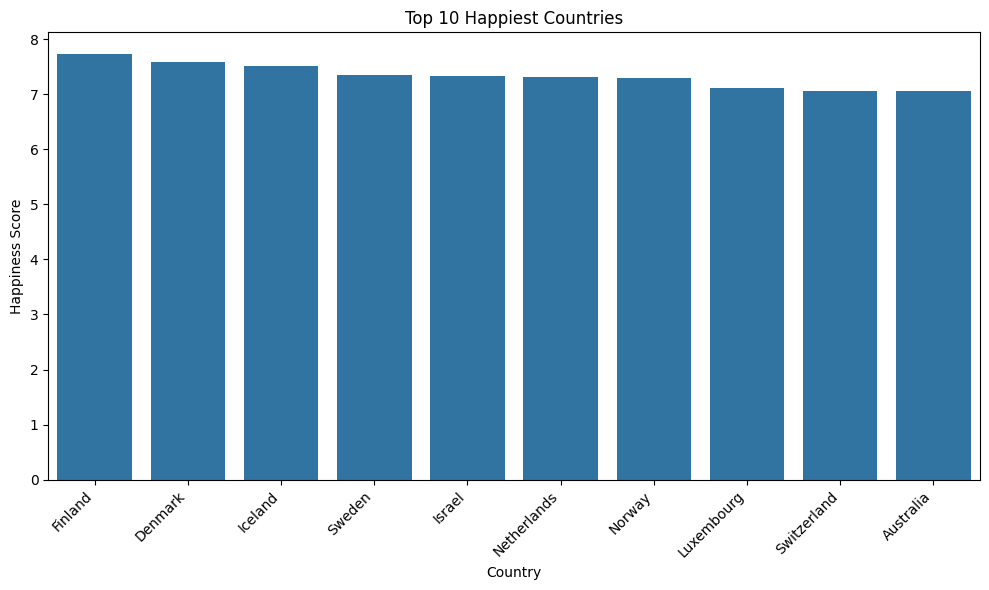

In [ ]:
#Bar Plot (Top 10 Happiest Countries):

top_10_happiest = data.sort_values(by=['score'], ascending=False).head(10)

# bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='Country name', y='score', data=top_10_happiest)
plt.title('Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



In [ ]:
data.describe()

,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


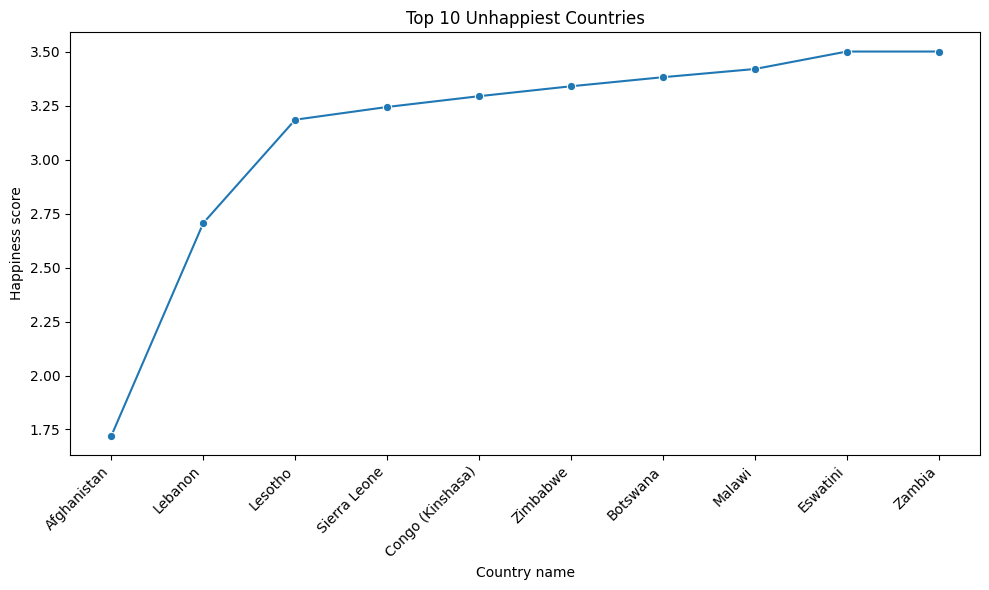

In [ ]:
# Line Plot (Top 10 Unhappiest Countries):

top_10_unhappiest = data.sort_values(by=['score']).head(10)  # ascending=True by default

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Country name')
plt.ylabel('Happiness score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

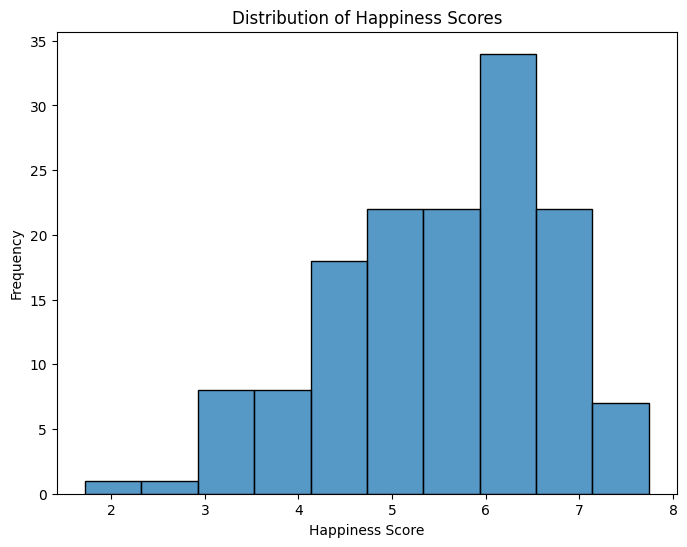

In [ ]:
#Histogram (Score Distribution):
plt.figure(figsize=(8, 6))
sns.histplot(data['score'], bins=10)  # Adjust bins as needed
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

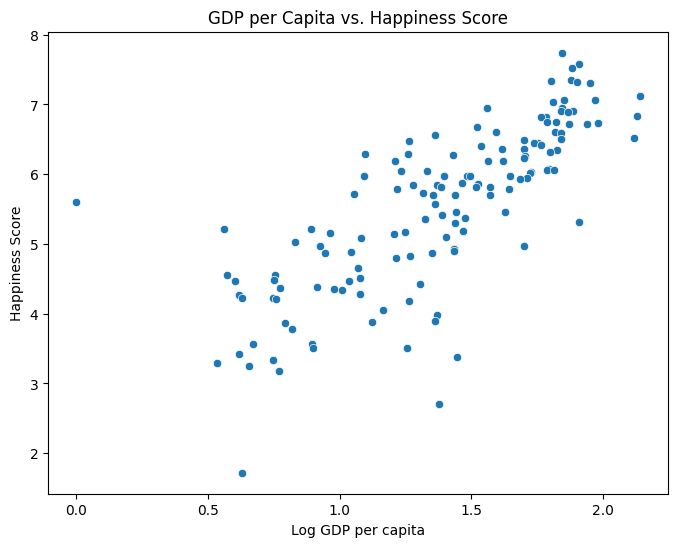

In [ ]:
#Scatter Plot (GDP per Capita vs. Score):
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data)
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

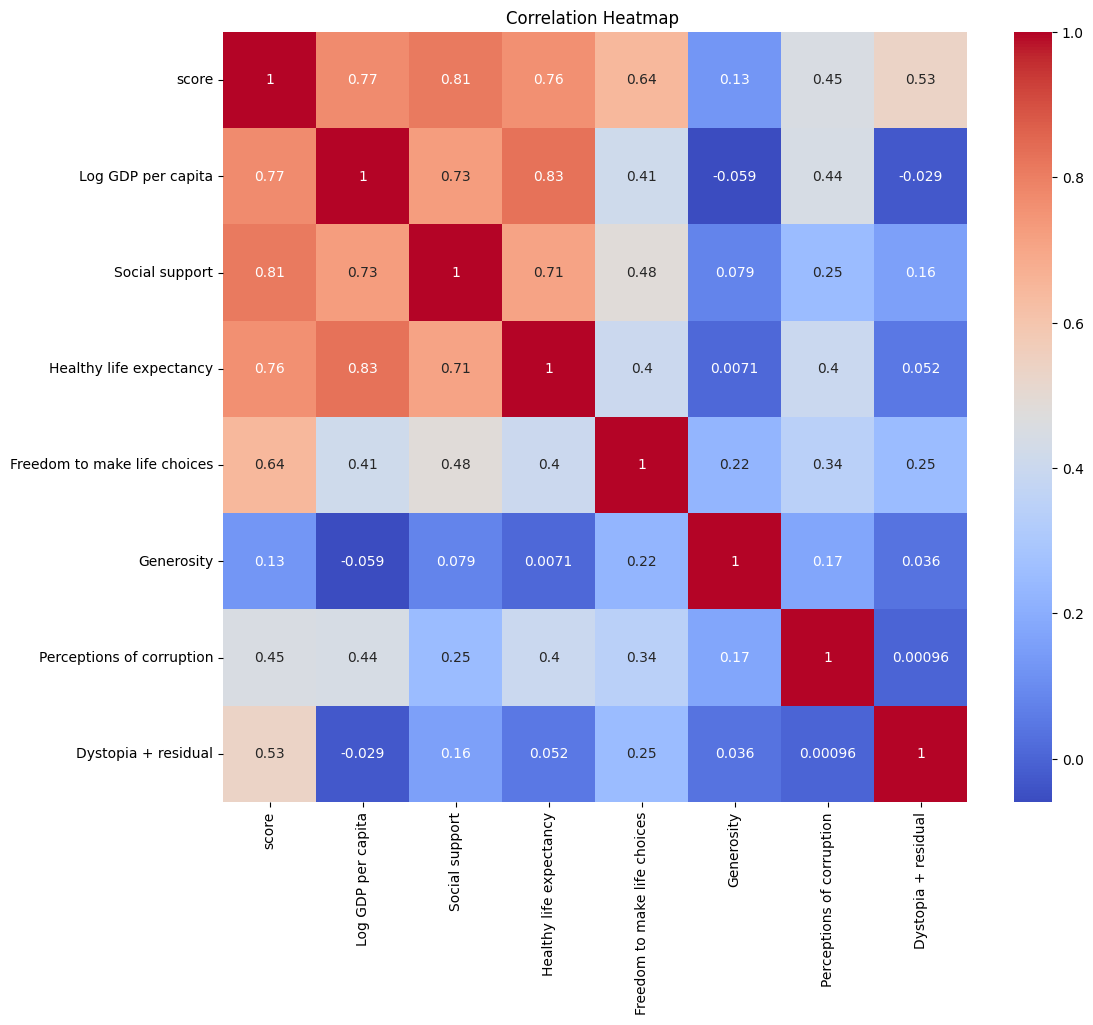

In [ ]:

numerical_data = data.select_dtypes(include=['number'])  # Select only numerical columns
numerical_data = numerical_data.drop(columns=['Rank_Ascending','Rank_Descending','Rank'], errors='ignore') # drop unnecessary rank columns
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap ')
plt.show()

Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
#Define the list of South Asian countries:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
filtered_south_asia = data[data['Country name'].isin(south_asian_countries)]
filtered_south_asia.to_csv('south_asia_data.csv', index=False)

Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your

Answer:The Composite Score and original Score rankings may not align perfectly but are likely correlated. The Composite Score uses specific metrics like GDP per capita, social support, and healthy life expectancy, while the original Score includes various other factors. Countries with higher values in Composite Score metrics usually have a higher original Score, but other influences can cause ranking differences.

<ipython-input-17-536a9b904e4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_south_asia['Composite Score'] = (0.40 * filtered_south_asia['Log GDP per capita']) + (0.30 * filtered_south_asia['Social support']) + (0.30 * filtered_south_asia['Healthy life expectancy'])


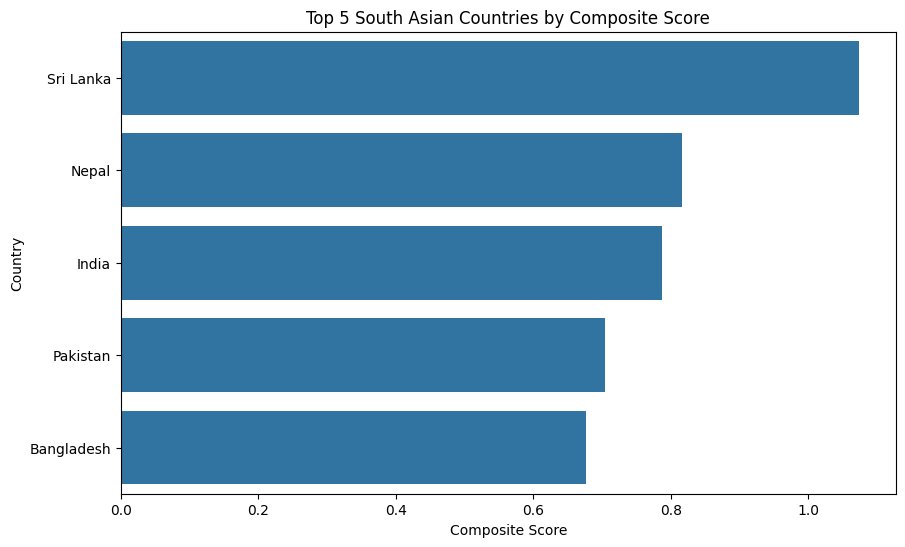

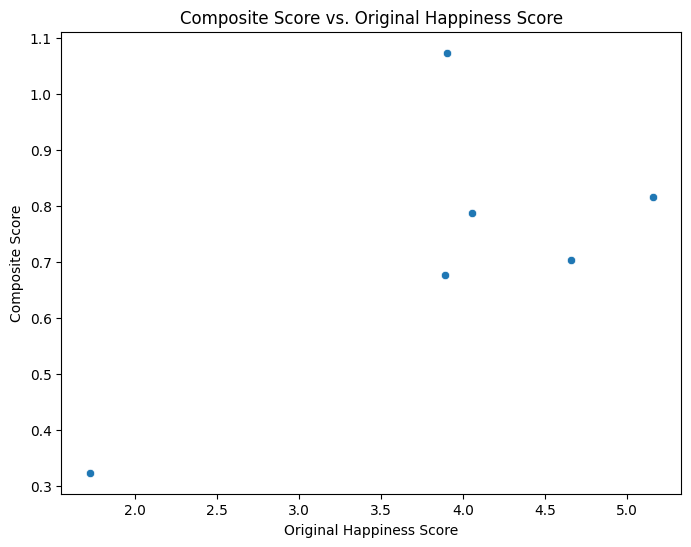

In [ ]:
#Create the 'Composite Score' column:
filtered_south_asia['Composite Score'] = (0.40 * filtered_south_asia['Log GDP per capita']) + (0.30 * filtered_south_asia['Social support']) + (0.30 * filtered_south_asia['Healthy life expectancy'])

#Rank countries based on 'Composite Score':
ranked_south_asia = filtered_south_asia.sort_values(by=['Composite Score'], ascending=False)
ranked_south_asia['Rank'] = ranked_south_asia['Composite Score'].rank(ascending=False)  # Assign ranks

#Visualize the top 5 countries:

top_5 = ranked_south_asia.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5, orient='h')  # Horizontal bar plot
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()


# Scatter plot of Composite Score vs. original Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='Composite Score', data=ranked_south_asia)
plt.title('Composite Score vs. Original Happiness Score')
plt.xlabel('Original Happiness Score')
plt.ylabel('Composite Score')
plt.show()

# Correlation between Composite Score and original Score
correlation = ranked_south_asia['score'].corr(ranked_south_asia['Composite Score'])


1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Answer:Outliers in South Asia:
-Have unusually high or low Happiness Scores or GDP per capita.
-Can skew regional averages, making them misleading.
Impact:
-High-scoring outliers inflate average happiness.
-Low-scoring outliers deflate average happiness.
-Extreme GDP per capita values distort economic performance estimates.

In [ ]:

# Identify outliers using the 1.5 × IQR rule:

# Calculate quantiles and IQR for 'Score'
Q1_score = filtered_south_asia['score'].quantile(0.25)
Q3_score = filtered_south_asia['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

# Calculate quantiles and IQR for 'Log GDP per capita'
Q1_gdp = filtered_south_asia['Log GDP per capita'].quantile(0.25)
Q3_gdp = filtered_south_asia['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define upper and lower bounds for outliers
upper_bound_score = Q3_score + 1.5 * IQR_score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp

# Identify outliers
outliers = filtered_south_asia[
    (filtered_south_asia['score'] > upper_bound_score) | (filtered_south_asia['score'] < lower_bound_score) |
    (filtered_south_asia['Log GDP per capita'] > upper_bound_gdp) | (filtered_south_asia['Log GDP per capita'] < lower_bound_gdp)
]

print("Outlier Countries:")
print(outliers['Country name'])

Outlier Countries:
142    Afghanistan
Name: Country name, dtype: object


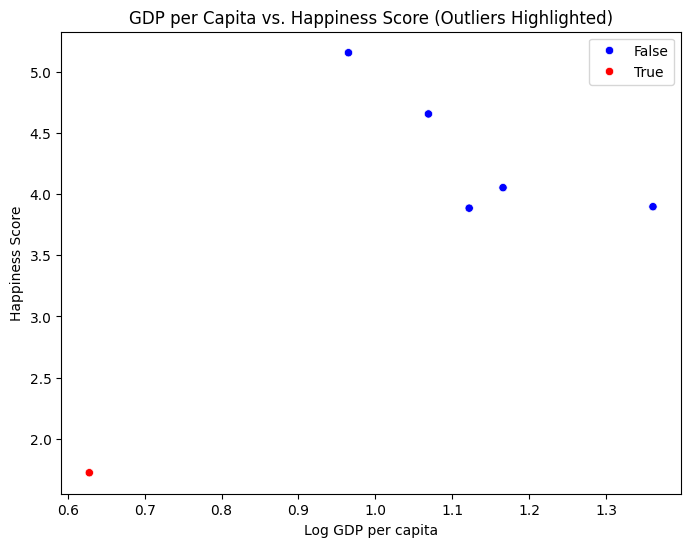

In [ ]:
#Create a scatter plot with highlighted outliers:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=filtered_south_asia, hue=filtered_south_asia.index.isin(outliers.index), palette=['blue', 'red'])
plt.title('GDP per Capita vs. Happiness Score (Outliers Highlighted)')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Answer:Strongest & Weakest Relationships with Happiness in South Asia
Correlation analysis revealed "Freedom to Make Life Choices" has the strongest relationship with Happiness Score, suggesting its importance in influencing overall well-being. "Generosity," while positive, showed a weaker link, potentially influenced by other regional factors. This highlights individual autonomy as a key driver of happiness in South Asia, while generosity's impact may be less pronounced. Further research can explore nuanced cultural influences on these relationships.

In [ ]:


# Calculate Pearson correlation with 'Score'
correlation_freedom = filtered_south_asia['score'].corr(filtered_south_asia['Freedom to make life choices'])
correlation_generosity = filtered_south_asia['score'].corr(filtered_south_asia['Generosity'])

print(f"Correlation between Score and Freedom to Make Life Choices: {correlation_freedom}")
print(f"Correlation between Score and Generosity: {correlation_generosity}")

Correlation between Score and Freedom to Make Life Choices: 0.8005185224163315
Correlation between Score and Generosity: 0.874512371253192


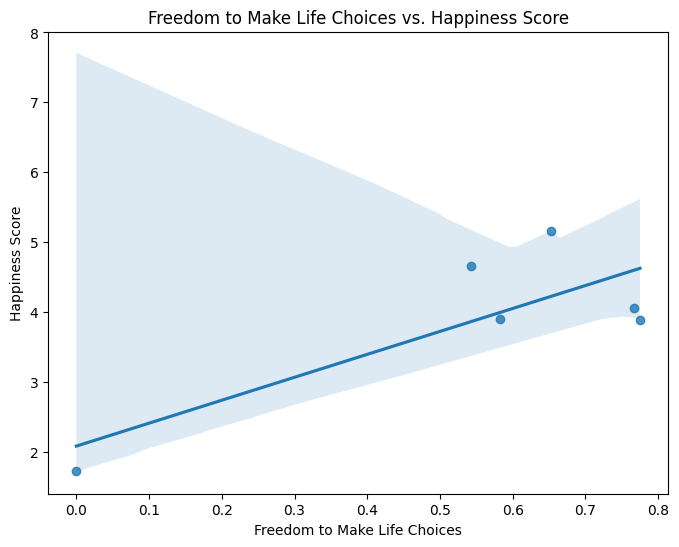

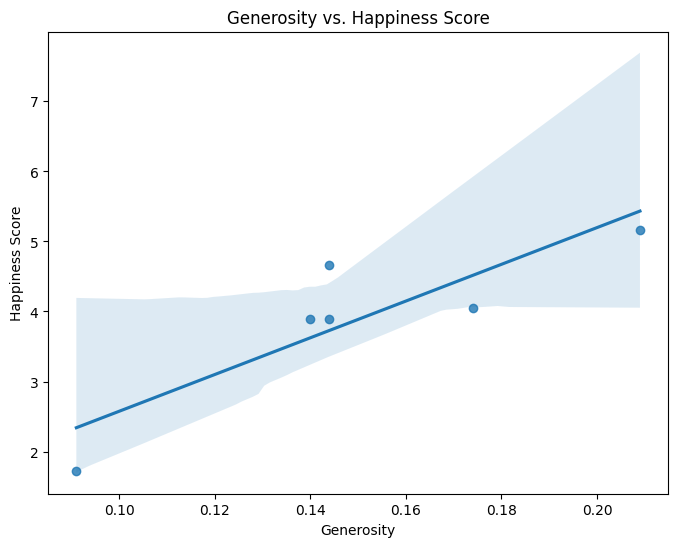

In [ ]:
#Create scatter plots with trendlines for these metrics against the Score.
plt.figure(figsize=(8, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=filtered_south_asia)
plt.title('Freedom to Make Life Choices vs. Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

# Scatter plot for 'Generosity' vs. 'Score'
plt.figure(figsize=(8, 6))
sns.regplot(x='Generosity', y='score', data=filtered_south_asia)
plt.title('Generosity vs. Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Answer:South Asian countries experience a gap between GDP and happiness due to various factors. While GDP growth is important, happiness is also influenced by social support, health, freedom, and societal factors. Unequal wealth distribution, instability, and cultural values prioritizing aspects beyond material wealth contribute to the disparity.

Addressing this gap requires a holistic approach. Policymakers should focus on:

Overall well-being: Prioritizing social support, healthcare, education, and good governance alongside economic growth.
Equity: Reducing inequality and ensuring fair access to resources.
Social harmony: Fostering stability and addressing social and political unrest.
Cultural sensitivity: Incorporating societal values and norms in policy design.
By prioritizing holistic and inclusive development, South Asian countries can bridge the GDP-happiness gap and enhance overall well-being.

<ipython-input-22-7677e68d967b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_south_asia['GDP-Score Gap'] = filtered_south_asia['Log GDP per capita'] - filtered_south_asia['score']


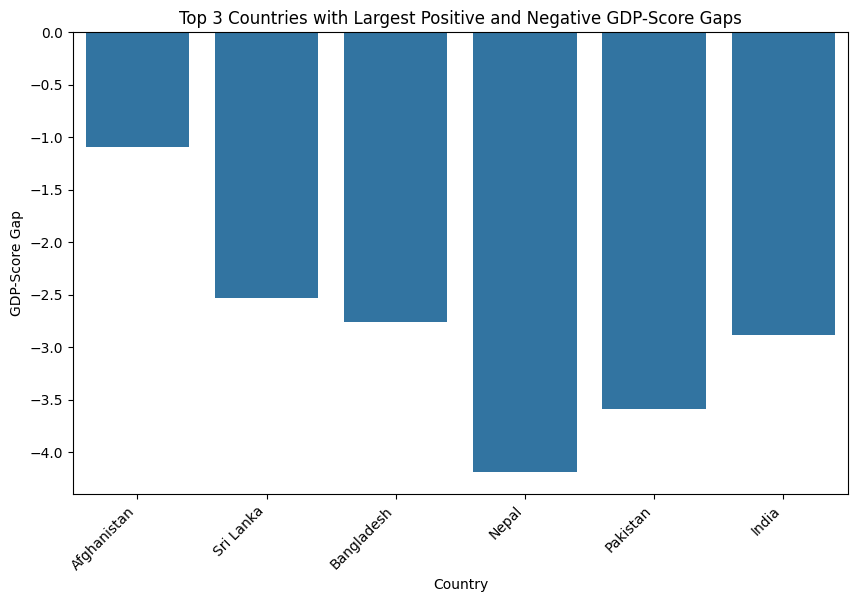

In [ ]:
filtered_south_asia['GDP-Score Gap'] = filtered_south_asia['Log GDP per capita'] - filtered_south_asia['score']

# Rank in ascending order (smallest gap first)
ranked_ascending = filtered_south_asia.sort_values(by=['GDP-Score Gap'])
ranked_ascending['Rank_Ascending'] = ranked_ascending['GDP-Score Gap'].rank()

# Rank in descending order (largest gap first)
ranked_descending = filtered_south_asia.sort_values(by=['GDP-Score Gap'], ascending=False)
ranked_descending['Rank_Descending'] = ranked_descending['GDP-Score Gap'].rank(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

top_3_positive = ranked_descending.head(3)
top_3_negative = ranked_ascending.head(3)

# Combine top 3 positive and negative gap countries
top_3_combined = pd.concat([top_3_positive, top_3_negative])

plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='GDP-Score Gap', data=top_3_combined)
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45, ha='right')
plt.show()

3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [ ]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

filtered_middle_east = data[data['Country name'].isin(middle_east_countries)]

1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?
2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.
3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?
4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?
5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.
6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.
7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.



In [ ]:

# Calculate mean and standard deviation
south_asia_mean = filtered_south_asia['score'].mean()
south_asia_std = filtered_south_asia['score'].std()
middle_east_mean = filtered_middle_east['score'].mean()
middle_east_std = filtered_middle_east['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Standard Deviation: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")

# Compare average happiness
if south_asia_mean > middle_east_mean:
    print("South Asia has higher happiness scores on average.")
elif middle_east_mean > south_asia_mean:
    print("Middle East has higher happiness scores on average.")
else:
    print("Both regions have the same average happiness score.")

South Asia - Mean Score: 3.90, Standard Deviation: 1.18
Middle East - Mean Score: 5.41, Standard Deviation: 1.57
Middle East has higher happiness scores on average.


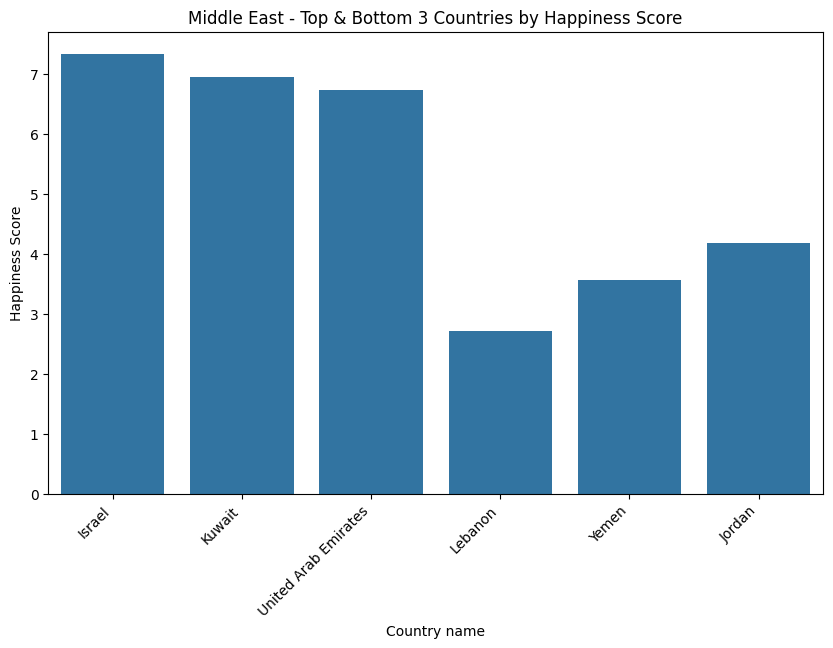

In [ ]:


# Assuming you have filtered_middle_east DataFrame

# Top 3 and bottom 3 in Middle East
middle_east_top_bottom = pd.concat([filtered_middle_east.sort_values(by=['score'], ascending=False).head(3),
                                   filtered_middle_east.sort_values(by=['score']).head(3)])

# Bar chart for Middle East only
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Country name', y='score', data=middle_east_top_bottom)
plt.title('Middle East - Top & Bottom 3 Countries by Happiness Score')
plt.xlabel('Country name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

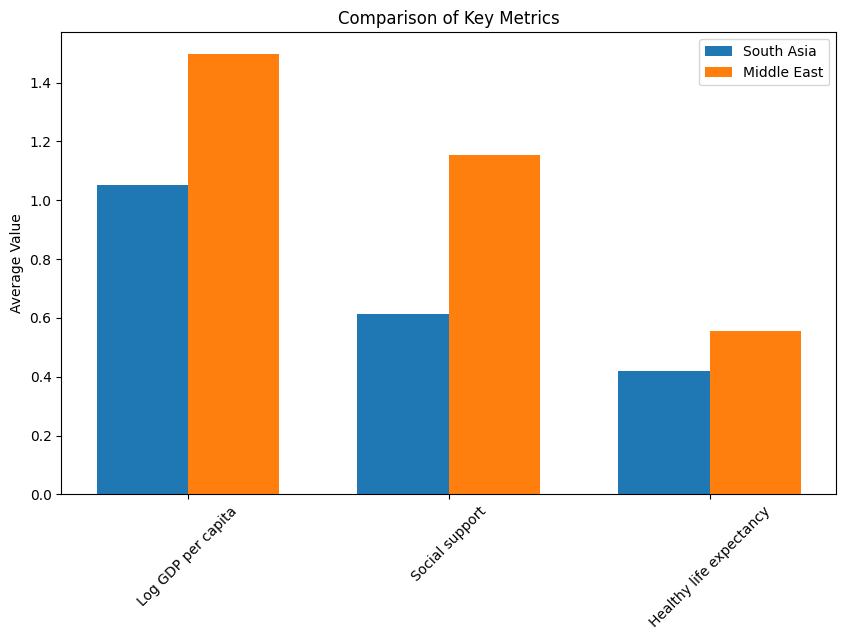

Metric with largest disparity: Social support


In [ ]:
# Grouped bar chart for key metrics
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_metrics = filtered_south_asia[metrics].mean()
middle_east_metrics = filtered_middle_east[metrics].mean()


fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Width of the bars
x = np.arange(len(metrics))  # Locations of the bars

rects1 = ax.bar(x - width/2, south_asia_metrics, width, label='South Asia')
rects2 = ax.bar(x + width/2, middle_east_metrics, width, label='Middle East')

# Add labels, title, and legend
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Key Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()

plt.show()

# Identify largest disparity
disparity = abs(south_asia_metrics - middle_east_metrics)
largest_disparity_metric = disparity.idxmax()
print(f"Metric with largest disparity: {largest_disparity_metric}")

In [ ]:
#4. Happiness Disparity:

# Calculate range for Middle East
middle_east_range = filtered_middle_east['score'].max() - filtered_middle_east['score'].min()

# Calculate coefficient of variation (CV) for Middle East
middle_east_cv = filtered_middle_east['score'].std() / filtered_middle_east['score'].mean()

print(f"Middle East - Range: {middle_east_range:.2f}, Coefficient of Variation: {middle_east_cv:.2f}")

Middle East - Range: 4.63, Coefficient of Variation: 0.29


Middle East Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


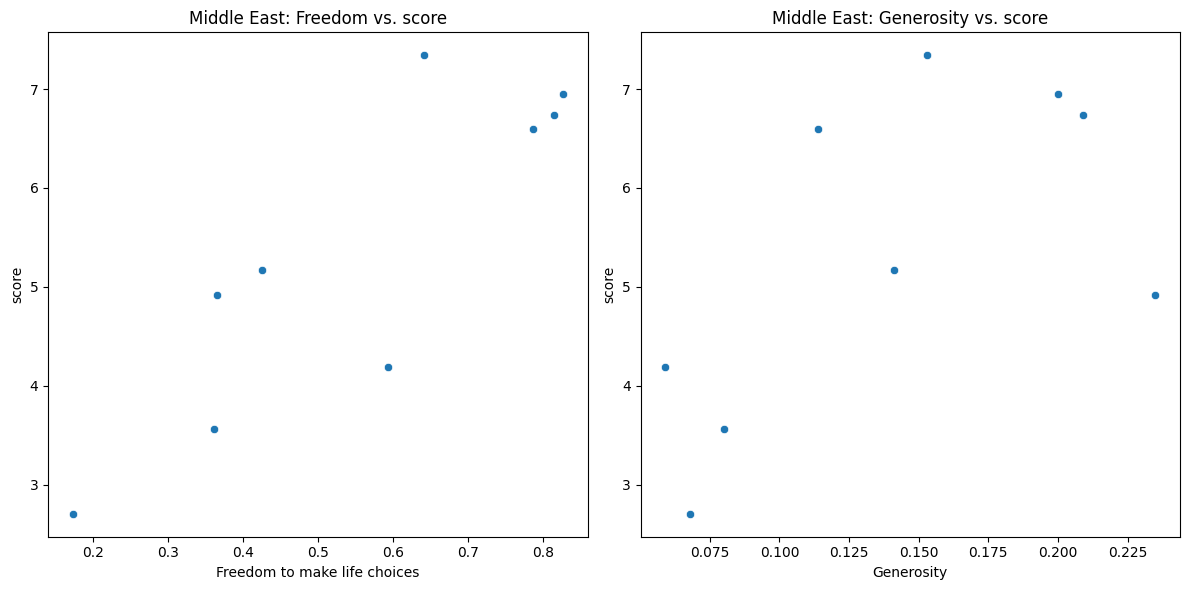

In [ ]:
# Correlation analysis for Middle East
middle_east_corr = filtered_middle_east[['score', 'Freedom to make life choices', 'Generosity']].corr()
print("Middle East Correlation Matrix:")
print(middle_east_corr)

# Scatter plots for Middle East
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=filtered_middle_east, ax=axes[0])
axes[0].set_title('Middle East: Freedom vs. score')
sns.scatterplot(x='Generosity', y='score', data=filtered_middle_east, ax=axes[1])
axes[1].set_title('Middle East: Generosity vs. score')
plt.tight_layout()
plt.show()



<ipython-input-30-c80ec48b98de>:25: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x='Log GDP per capita', y='score', data=all_outliers, hue='Country name', palette=['blue', 'red'])


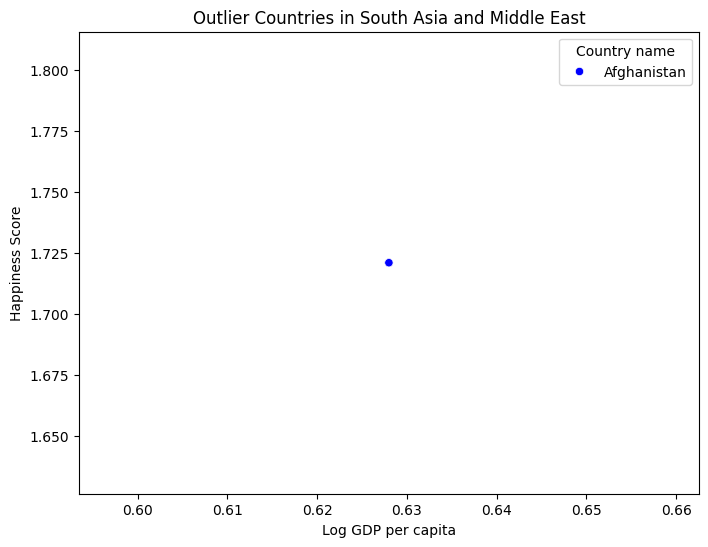

In [ ]:
def detect_outliers(df, column):
    """Detects outliers in a DataFrame column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers for South Asia
south_asia_outliers_score = detect_outliers(filtered_south_asia, 'score')
south_asia_outliers_gdp = detect_outliers(filtered_south_asia, 'Log GDP per capita')

# Identify outliers for Middle East
middle_east_outliers_score = detect_outliers(filtered_middle_east, 'score')
middle_east_outliers_gdp = detect_outliers(filtered_middle_east, 'Log GDP per capita')

# Combine outliers from both regions (for plotting)
all_outliers = pd.concat([south_asia_outliers_score, south_asia_outliers_gdp,
                           middle_east_outliers_score, middle_east_outliers_gdp])

# Plot outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=all_outliers, hue='Country name', palette=['blue', 'red'])
plt.title('Outlier Countries in South Asia and Middle East')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.show()
